In [23]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from cmath import isnan

In [33]:
def metropolis_hastings(pdf, size, burn_length):
    x = np.zeros(shape=size + burn_length + 1)

    i = 0

    while i < size + burn_length:

        y = np.random.normal(loc=x[i])

        alpha = pdf(y) / pdf(x[i])

        if isnan(alpha):
            alpha=1
        
        u = np.random.uniform()

        if u < alpha:
            x[i+1] = y
            i += 1
        else:
            pass
        
    return x[burn_length:]

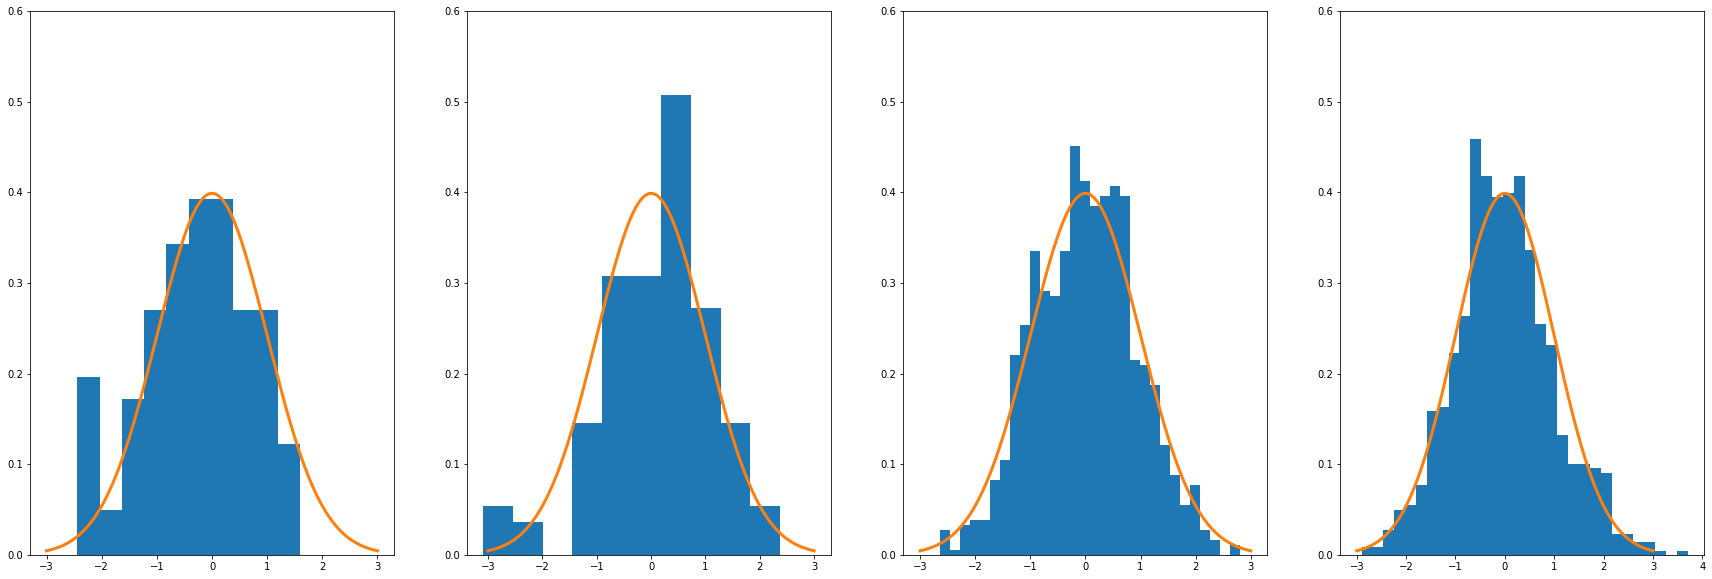

In [65]:
# want to simulate from a standard normal distribution
pdf = lambda x: scipy.stats.norm.pdf(x)*100

plt.rcParams['figure.figsize'] = [30, 10]

fig, axes = plt.subplots(ncols=4)

axes[0].hist(metropolis_hastings(pdf, size=100, burn_length=0), bins=10, density=True)
axes[1].hist(metropolis_hastings(pdf, size=100, burn_length=100), bins=10, density=True)
axes[2].hist(metropolis_hastings(pdf, size=1000, burn_length=0), bins=30, density=True)
axes[3].hist(metropolis_hastings(pdf, size=1000, burn_length=100), bins=30, density=True)

for ax in axes.flatten():
    ax.set_ylim(0, 0.6)
    ax.plot(np.linspace(-3, 3, 1000), scipy.stats.norm.pdf(np.linspace(-3, 3, 1000)), linewidth=3)

plt.show()
